<a href="https://colab.research.google.com/github/IKEDAKAZUKI/Qiskit-Tutorial/blob/main/Quantum_Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We demonstrate Quantum Teleportation with Real Quantum Computers.
More infortmation will be provided in my personal [website](https://kazukiikeda.studio.site/)


# Install Qiskit and packages

Install Qiskit.

In [ ]:
pip install qiskit

In [ ]:
pip install qiskit-aer

In [ ]:
from qiskit_aer.aerprovider import AerSimulator
import numpy as np
from qiskit import * #qiskit
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.circuit.library import Initialize
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.quantum_info import random_statevector

# Quantum Circuits for Quantum Teleportation

Generate an input state at random.

<IPython.core.display.Latex object>

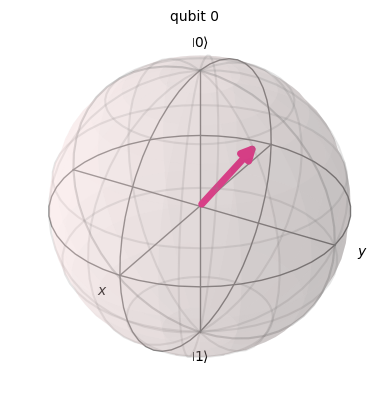

In [ ]:
psi = random_statevector(2)
# Show it on a Bloch sphere
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
plot_bloch_multivector(psi)

Meausure this state and see what you will get.

In [ ]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

qc = QuantumCircuit(qr, cr)

init_gate = Initialize(psi)
qc.append(init_gate, [0]) #put an input state

qc.measure(0,0)
qc.draw()


┌─────────────────────────────────────────────────┐┌─┐
 q13: ┤ Initialize(-0.70629-0.041336j,0.69862+0.10664j) ├┤M├
      └─────────────────────────────────────────────────┘└╥┘
c3: 1/════════════════════════════════════════════════════╩═
                                                          0

In [ ]:
n_shots=1000

simulator=AerSimulator()

qc_total = transpile(qc, simulator)

job = simulator.run(qc_total, backend=simulator, shots=n_shots)
job.status()

<JobStatus.INITIALIZING: 'job is being initialized'>

{'1': 512, '0': 488}


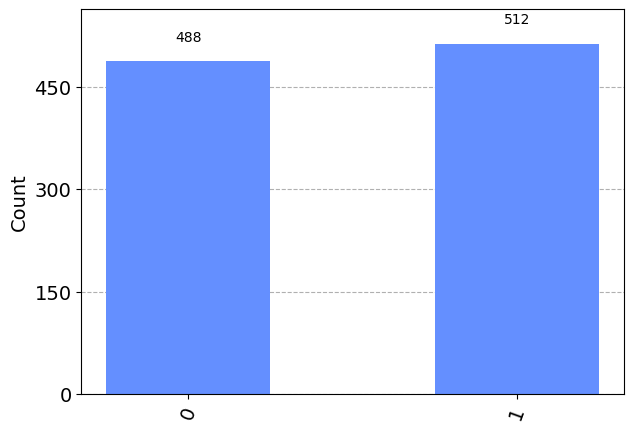

In [ ]:
results = job.result()
counts = results.get_counts(qc_total)
print(counts)
plot_histogram(counts)

Teleport this state to the third qubit.
The quantum circuit for quantum teleportation is given below.

In [ ]:
qr = QuantumRegister(3)
cr = ClassicalRegister(1)

qc = QuantumCircuit(qr, cr)

init_gate = Initialize(psi)
qc.append(init_gate, [0]) #put an input state

#create Bell pair
qc.h(qr[1])
qc.cx(qr[1],qr[2])

#Bell measurement
qc.cx(qr[0],qr[1])
qc.h(qr[0])

#Equivalent to conditional operation
qc.cx(qr[1],qr[2])
qc.cz(qr[0],qr[2])

qc.measure(2,0)
qc.draw()

┌─────────────────────────────────────────────────┐          ┌───┐      
q16_0: ┤ Initialize(-0.70629-0.041336j,0.69862+0.10664j) ├───────■──┤ H ├─■────
       └──────────────────────┬───┬──────────────────────┘     ┌─┴─┐└───┘ │    
q16_1: ───────────────────────┤ H ├─────────────────────────■──┤ X ├──■───┼────
                              └───┘                       ┌─┴─┐└───┘┌─┴─┐ │ ┌─┐
q16_2: ───────────────────────────────────────────────────┤ X ├─────┤ X ├─■─┤M├
                                                          └───┘     └───┘   └╥┘
 c4: 1/══════════════════════════════════════════════════════════════════════╩═
                                                                             0

Run the program.

In [ ]:
n_shots=1000
qc_total = transpile(qc, simulator)

job = simulator.run(qc_total, backend=simulator, shots=n_shots)
job.status()

<JobStatus.INITIALIZING: 'job is being initialized'>

{'1': 513, '0': 487}


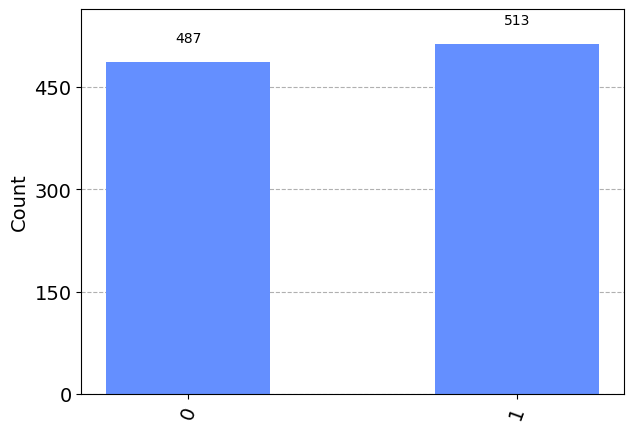

In [ ]:
results = job.result()
counts = results.get_counts(qc_total)
print(counts)
plot_histogram(counts)

Compare this histogram with the previous one to see if they agree.
If the histograms match, it means that the teleportation was successfully completed.

# Quantum Teleportation on a Real Quantum Computer

Test quantum teleportation on a real quantum device.
Create your IBM token for free [here](https://quantum-computing.ibm.com/).
You'll have access to 7-qubit and 5-qubit quantum computers.  

In [ ]:
# Enable your account on Qiskit, replace 'My_API_Token' with your newly generated token
#qiskit.IBMQ.save_account('My_API_Token')
qiskit.IBMQ.load_accounts()
# After loading credentials we query the backends
qiskit.IBMQ.backends()

In [ ]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

Get the least-busy IBM quantum computer.

In [ ]:
from qiskit.providers.ibmq import least_busy

small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits >= 0
                                   and not x.configuration().simulator)
backend=least_busy(small_devices)

print("Name", backend.name())
print("Status", backend.status())
print("Limit",backend.job_limit())
print("Remaining Jobs",backend.remaining_jobs_count())
print("Number of Active Jobs",backend.active_jobs())

In [ ]:
n_shots=1000
qc_total = transpile(qc, backend)

job = execute(qc_total, backend=backend, shots=n_shots)
job.status()

In [ ]:
results = job.result()
counts = results.get_counts(qc_total)
plot_histogram([counts])